# Clase 15. Aprendizaje no supervisado

1. Reducción de dimensionalidad

- Proyección lineal
  - PCA
    - PCA
    - Incremental PCA
    - Sparse PCA
    - Kernel PCA
  - SVD
  - Proyección aleatoria
    - Gaussiana
    - Sparse

- Manifold learning
  - Isomap
  - MDS
  - Locally Linear Embedding (LLE)
  - t-distributed stochastic neighbor embedding (t-SNE)
  

2. Clustering

- K-Means


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import plotly.express as px

## Reducción de dimensionalidad

### PCA


Es empleado para:

- Comparar a los individuos a través de visualización gráfica.

- Describir relaciones entre variables.

- Reducir la dimensionalidad

El procedimiento es simple:

1. Obtener la matrix $\textbf{X}_e$, donde

$$x_{ij}^e=\frac{x_{ij}-\bar{x}_j}{\sigma_j}$$

2. Obtener la matriz de covarianzas, a saber

$$\textbf{V}_X=\frac{1}{n}\textbf{X}'\textbf{X}$$

3. Descomposición de la varianza a través de los valores y vectores propios. La matriz de covarianzas es simétrica y tendremos tantos valores y vectores propios como variables.

In [ ]:
pd.read_csv('/content/datos_crimen.csv', index_col='Unnamed: 0').head()

,abigeato,amenazas,delitos_sexuales,extorsion,homicidios,homicidios_en_accidente_de_transito,hurto_a_comercio,hurto_a_entidades_financieras,hurto_a_personas,hurto_a_residencias,hurto_automotores,hurto_motocicletas,lesiones_en_accidente_de_transito,lesiones_personales,pirateria_terrestre,secuestro,terrorismo,violencia_intrafamiliar
amazonas,0.000000,100.327318,183.097355,7.524549,7.524549,2.508183,137.950062,0.000000,205.671002,127.917330,0.000000,42.639110,2.508183,342.366972,0.000000,0.000000,0.000000,168.048257
antioquia,2.629873,29.386613,74.183099,20.448000,34.823654,11.332093,134.389459,0.162520,566.338691,80.344094,23.092648,114.591539,88.543978,187.563124,0.384139,0.103422,1.048994,241.549391
arauca,13.537196,154.763081,109.761050,49.026602,58.539227,21.586340,79.393826,0.000000,184.398564,87.077100,17.927638,87.808840,46.831381,169.763758,13.171326,2.561091,23.049821,138.664793
atlántico,2.836504,65.317294,77.129583,7.732386,20.010950,7.499249,103.590664,0.427418,583.154044,59.333437,12.123138,64.617882,25.256538,219.149041,0.893693,0.077712,0.000000,120.881679
bolívar,10.840380,79.799772,62.263863,9.018467,17.399265,8.927372,89.911387,0.136643,331.952475,65.042280,4.736973,59.166612,15.076327,219.722659,0.592122,0.091096,0.000000,151.856415


In [ ]:
from sklearn.datasets import load_iris

X = load_iris()['data']
y = load_iris()['target']

X_scal = np.zeros(X.shape)

for i in range(X_scal.shape[1]):
  X_scal[:,i] = (X[:,i] - X[:,i].mean())/X[:,i].std()

In [ ]:
X_scal[:5]

In [ ]:
cov = X_scal.T.dot(X_scal)/X_scal.shape[0]

In [ ]:
cov

In [ ]:
eigvals, eigvecs = np.linalg.eig(cov)

In [ ]:
eigvals

In [ ]:
eigvecs

In [ ]:
varianza_explicada = {i:i/sum(eigvals) for  i in eigvals}

In [ ]:
varianza_explicada

In [ ]:
inercia = pd.DataFrame({'eigvals':eigvals,
              'inercia_acum': np.cumsum(eigvals),
              'v_expl':varianza_explicada.values(),
              'v_expl_acum':np.cumsum([i for i in varianza_explicada.values()])})

In [ ]:
inercia.T

In [ ]:
proyec = X_scal.dot(eigvecs[:,:2])

In [ ]:
proyec[:5]

In [ ]:
proyec = pd.DataFrame(proyec,
             columns=['PC1','PC2'])

In [ ]:
proyec.head()

In [ ]:
plt.scatter(proyec['PC1'],proyec['PC2'])

In [ ]:
plt.scatter(proyec['PC1'][y==0],proyec['PC2'][y==0])
plt.scatter(proyec['PC1'][y==1],proyec['PC2'][y==1])
plt.scatter(proyec['PC1'][y==2],proyec['PC2'][y==2])

In [ ]:
from sklearn.datasets import make_blobs, make_classification, make_circles, load_breast_cancer

X_b, y_b = make_blobs(n_samples=1000, centers=2,cluster_std=2)
X_c, y_c = make_classification(n_samples=1000, n_informative=3)
X_ci, y_ci = make_circles(n_samples=400, factor=0.3, noise=0.05)

#### Visualización de los datos artificiales

In [ ]:
X = load_breast_cancer()['data']
y = load_breast_cancer()['target']

In [ ]:
X.shape, y.shape

In [ ]:
fig, ax = plt.subplots(1,3, figsize=(16,6))

for pos,(datos,res,nombre) in enumerate(zip([X_b, X_c, X_ci],[y_b,y_c,y_ci],['Blobs','Clasificación','Círculos'])):
  ax[pos].scatter(datos[res==0,0],datos[res==0,1])
  ax[pos].scatter(datos[res==1,0],datos[res==1,1])
  ax[pos].set_title(nombre)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
x_pca = pca.fit_transform(X_b)

plt.scatter(x=x_pca[:,0][y_b==0], y=x_pca[:,1][y_b==0])
plt.scatter(x=x_pca[:,0][y_b==1], y=x_pca[:,1][y_b==1])

In [ ]:
pca = PCA()
x_pca = pca.fit_transform(X_c)

plt.scatter(x=x_pca[y_c==0,0], y=x_pca[y_c==0,1])
plt.scatter(x=x_pca[y_c==1,0], y=x_pca[y_c==1,1])

In [ ]:
pca = PCA()
x_pca = pca.fit_transform(X_ci)

plt.scatter(x=x_pca[y_ci==0,0], y=x_pca[y_ci==0,1])
plt.scatter(x=x_pca[y_ci==1,0], y=x_pca[y_ci==1,1])

In [ ]:
plt.scatter(x= X[y==0,0],y=X[y==0,1])
plt.scatter(x= X[y==1,0],y=X[y==1,1])

In [ ]:
pca = PCA()
x_pca = pca.fit_transform(X)

plt.scatter(x=x_pca[y==0,0],y=x_pca[y==0,1])
plt.scatter(x=x_pca[y==1,0],y=x_pca[y==1,1])

### Incremental PCA

El procedimiento frente al PCA utilizado anteriormente es el mismo, la diferencia radica en la capacidad necesaria de computo. Ante una gran cantidad de datos, la programación de IPCA es más apropiada dado que reduce la complejidad computacional.

In [ ]:
from sklearn.decomposition import IncrementalPCA

pca = IncrementalPCA()
x_pca = pca.fit_transform(X_b)


plt.scatter(x=x_pca[:,0][y_b==0], y=x_pca[:,1][y_b==0])
plt.scatter(x=x_pca[:,0][y_b==1], y=x_pca[:,1][y_b==1])

In [ ]:
pca = IncrementalPCA()
x_pca = pca.fit_transform(X_c)


plt.scatter(x=x_pca[:,0][y_c==0], y=x_pca[:,1][y_c==0])
plt.scatter(x=x_pca[:,0][y_c==1], y=x_pca[:,1][y_c==1])

In [ ]:
pca = IncrementalPCA()
x_pca = pca.fit_transform(X_ci)


plt.scatter(x=x_pca[:,0][y_ci==0], y=x_pca[:,1][y_ci==0])
plt.scatter(x=x_pca[:,0][y_ci==1], y=x_pca[:,1][y_ci==1])

### Sparse PCA

Así como el IPCA, el SPCA lleva a cabo el mismo procedimiento de PCA solo que permite que los datos no estén tan compactos como en este.

In [ ]:
from sklearn.decomposition import SparsePCA

pca = SparsePCA()
x_pca = pca.fit_transform(X_b)


plt.scatter(x=x_pca[:,0][y_b==0], y=x_pca[:,1][y_b==0])
plt.scatter(x=x_pca[:,0][y_b==1], y=x_pca[:,1][y_b==1])

In [ ]:
pca = SparsePCA()
x_pca = pca.fit_transform(X_c)


plt.scatter(x=x_pca[:,0][y_c==0], y=x_pca[:,1][y_c==0])
plt.scatter(x=x_pca[:,0][y_c==1], y=x_pca[:,1][y_c==1])

In [ ]:
pca = SparsePCA()
x_pca = pca.fit_transform(X_ci)


plt.scatter(x=x_pca[:,0][y_ci==0], y=x_pca[:,1][y_ci==0])
plt.scatter(x=x_pca[:,0][y_ci==1], y=x_pca[:,1][y_ci==1])

### Kernel PCA

Como ya se ha visto en algoritmos anteriores, la kernel es una función que mapea sobre los datos, esto permite extraer información cuando se presentan no linealidades en la información. Por defecto, la kernel es 'linear', pero se pueden seleccionar, además de esa:

- 'poly'
- 'rbf'
- 'sigmoid'
- 'cosine'
- 'precomputed'

In [ ]:
from sklearn.decomposition import KernelPCA

pca = KernelPCA(kernel='rbf',gamma=0.1)
x_pca = pca.fit_transform(X_b)


plt.scatter(x=x_pca[:,0][y_b==0], y=x_pca[:,1][y_b==0])
plt.scatter(x=x_pca[:,0][y_b==1], y=x_pca[:,1][y_b==1])

In [ ]:
pca = KernelPCA()
x_pca = pca.fit_transform(X_c)


plt.scatter(x=x_pca[:,0][y_c==0], y=x_pca[:,1][y_c==0])
plt.scatter(x=x_pca[:,0][y_c==1], y=x_pca[:,1][y_c==1])

In [ ]:
kpca = KernelPCA(kernel='rbf',gamma=2)
x_pca = kpca.fit_transform(X_ci)


plt.scatter(x=x_pca[:,0][y_ci==0], y=x_pca[:,1][y_ci==0])
plt.scatter(x=x_pca[:,0][y_ci==1], y=x_pca[:,1][y_ci==1])

### SVD

Otra forma para extraer la estructura subyacente de los datos es reducir el rango de la matriz original a un rango más pequeño tal que la matriz original pueda ser recreada utilizando una combinación lineal de algunos de los vectores en la matriz de rango más pequeño.

$$A=U\Sigma V'$$

In [ ]:
from sklearn.decomposition import TruncatedSVD
from sklearn.datasets import load_iris


X = load_iris()['data']
y = load_iris()['target']

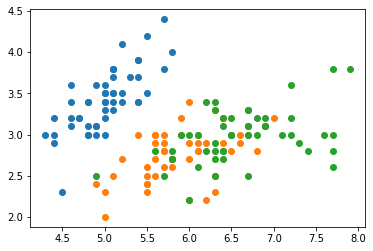

In [ ]:
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.scatter(X[y==2,0],X[y==2,1])

In [ ]:
svd = TruncatedSVD()
X_svd = svd.fit_transform(X)

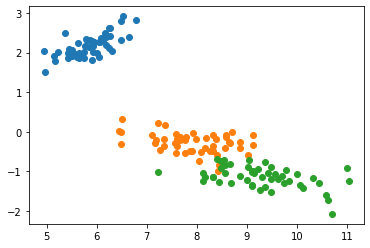

In [ ]:
plt.scatter(X_svd[y==0,0],X_svd[y==0,1])
plt.scatter(X_svd[y==1,0],X_svd[y==1,1])
plt.scatter(X_svd[y==2,0],X_svd[y==2,1])

## Proyección aleatoria

La técnica de proyección aleatoria para la reducción de dimensionalidad se apoya en el Lemma Johnson-Lindenstauss. Según este, los puntos en un espacio de alta dimensionalidad pueden ser embebidas en un espacio de dimensión mucho más pequeña pero cuasiconvservando las distancias. En otras palabras, la estructura relevante del conjunto de datos inicial se preserva.

### Gaussiana

La proyección aleatoria gaussiana reduce la dimensionalidad proyectando los datos originales sobre una matriz generada aleatoriamente a partir de la distribución

$$N\bigg(0,\frac{1}{n_{componentes}}\bigg)$$

Este método es ampliamente utilizado es la reducción de dimensionalidad de imágenes, texto y minería de datos en big data.

#### Ventajas y limitaciones

1. No sufre de la "maldición de la dimensionalidad".
2. Computacionalmente eficiente.
3. Proveen una garantía de la preservación de la distancia en el espacio con pocas dimensiones. Puede ser utilizado para el clustering
4. Dado que se requiere de un grado de aleatoriedad, el algoritmo puede tornarse inestable.

In [ ]:
from sklearn.random_projection import GaussianRandomProjection

grp = GaussianRandomProjection(n_components=2)

In [ ]:
X_grp = grp.fit_transform(X)

In [ ]:
X_grp.shape

(150, 2)

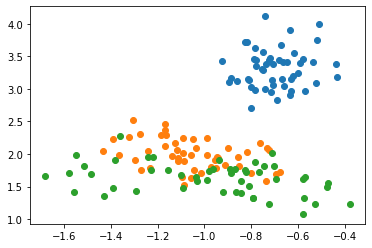

In [ ]:
plt.scatter(X_grp[y==0,0],X_grp[y==0,1])
plt.scatter(X_grp[y==1,0],X_grp[y==1,1])
plt.scatter(X_grp[y==2,0],X_grp[y==2,1])

### Sparse random projection

Este método reduce la dimensionalidad proyectando el input original utilizando una matriz aleatoria de tipo 'sparse'. Esto garantiza resultados similares pero siendo computacionalmente mucho más eficientes.

In [ ]:
from sklearn.random_projection import SparseRandomProjection

srp = SparseRandomProjection(n_components=2)

In [ ]:
X_srp = srp.fit_transform(X)

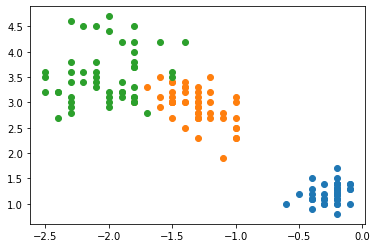

In [ ]:
plt.scatter(X_srp[y==0,0],X_srp[y==0,1])
plt.scatter(X_srp[y==1,0],X_srp[y==1,1])
plt.scatter(X_srp[y==2,0],X_srp[y==2,1])

## Manifold learning

El aprendizaje de variedad extrae información relevante cuando el espacio de los datos no es euclídeo o no se aproxima al espacio euclídeo.

### Isomap

Cuando se tiene esta circunstancia es posible que la distancia euclidiana no sea la más acertada para calcular el espacio entre dos o más puntos. La distancia geodésica puede ser más apropiada. Esta puede ser aproximada a través de distancia de grafos entre dos puntos. El algoritmo Isomap utiliza el concepto de distancia geodésica para resolver el problema de reducción de dimensionalidad.

#### Algoritmo de Isomap

1. Para cada punto de los datos originales hay que encontrar los $k$-vecinos más cercanos (con respecto a la distancia real en el espacio multidimensional).
2. Graficar el grafo $G=(V,E)$. Cada punto en el conjunto de datos es un vértice del grafo, y cada punto en este grafo es conectado a sus $k$-vecinos más cercanos.
3. Calcular la distancia entre todos los pares de puntos utilizando la distancia geodésica de grafos como métrica y representándolo como una matriz.
4. Encontrar los puntos en el espacio dimensional más pequeño tales que las distancias por parejas entre puntos sean aproximadamente las mismas distancias entre los puntos en el grafo.

#### Ventajas y limitaciones

1. Funciona muy bien cuando los datos son fuertemente no lineales.
2. Encontrar el valor acertado de $k$ puede ser complicado.
3. Si no se tiene mucha información puede que el cálculo de las distancias no sea acertado.


In [ ]:
from sklearn.manifold import Isomap
from sklearn.datasets import load_digits

digits = load_digits(n_class=6)
X = digits.data
y = digits.target

isomap = Isomap(n_neighbors=10, n_components=2)

X_iso = isomap.fit_transform(X)

<Figure size 432x288 with 0 Axes>

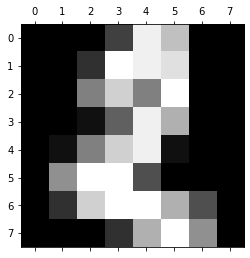

In [ ]:
plt.gray()
plt.matshow(digits.images[2])

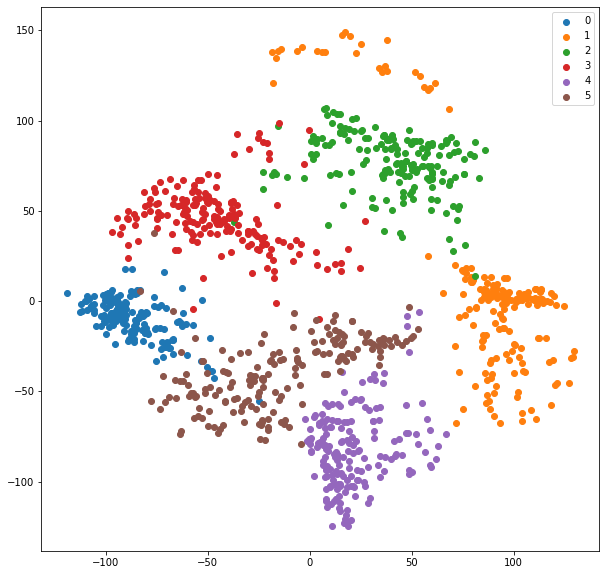

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(X_iso[y==0,0],X_iso[y==0,1], label='0')
plt.scatter(X_iso[y==1,0],X_iso[y==1,1], label='1')
plt.scatter(X_iso[y==2,0],X_iso[y==2,1], label='2')
plt.scatter(X_iso[y==3,0],X_iso[y==3,1], label='3')
plt.scatter(X_iso[y==4,0],X_iso[y==4,1], label='4')
plt.scatter(X_iso[y==5,0],X_iso[y==5,1], label='5')
plt.legend()

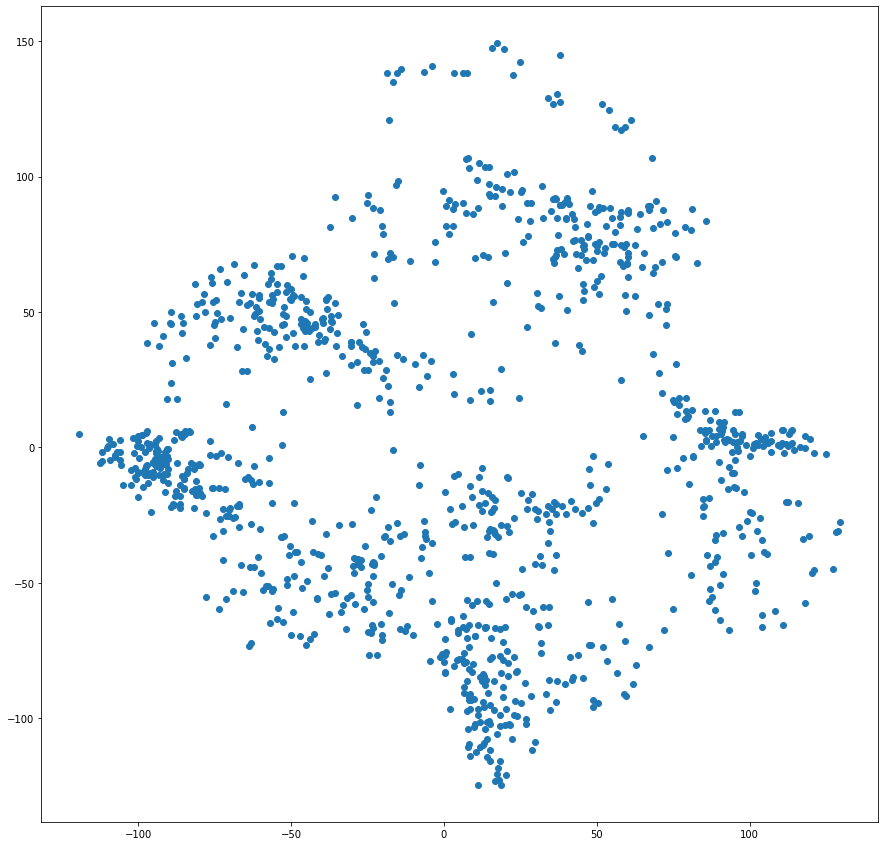

In [ ]:
plt.figure(figsize=(15,15))
plt.scatter(X_iso[:,0],X_iso[:,1])

### Multidimensional Scaling (MDS)

Es una técnica que busca preservar la distancia espacial de los datos. Estos es, encuentra una variedad no lineal de menor dimensión que represente los puntos de los datos preservando la distancia espacial entre los puntos en el espacio dimensional original.

Es ampliamente utilizada en datos de las ciencias sociales.

Algoritmo


1. Computar la matriz $D$

$$D_{i,j}=M^2_{i,j}$$
2. Calcular

$$-\frac{1}{2}\bigg(I-\frac{1}{n}1 1^T\bigg)D\bigg(I-\frac{1}{n}11^T\bigg)$$
3. Encontrar $U_1$,$U_2$,...,$U_p$, el top $p$ de vectores propios con los valores propios correspondientes $\lambda_1$,$\lambda_2$,...,$\lambda_p$
4. Calcular la matriz $n\times p$ $Y$ estableciendo la columna $i$-ésima como $\sqrt{\lambda_i}U_i$

#### Ventajas y limitaciones

1. Intenta mantener la distancia euclidiana en una dimensión menor. No obstante, esta métrica funciona solo si la estrucutra de la vecindad puede ser aproximada como una estructura lineal en variedades no lineales.
2. Requiere poder computacional.
3. El resultado de MDS depende de las decisiones tomadas a priori.

In [ ]:
from sklearn.manifold import MDS

mds = MDS(n_components=2)

X_mds = mds.fit_transform(X)

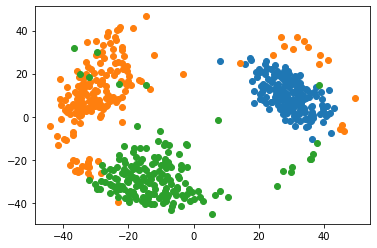

In [ ]:
plt.scatter(X_mds[y==0,0],X_mds[y==0,1])
plt.scatter(X_mds[y==1,0],X_mds[y==1,1])
plt.scatter(X_mds[y==2,0],X_mds[y==2,1])

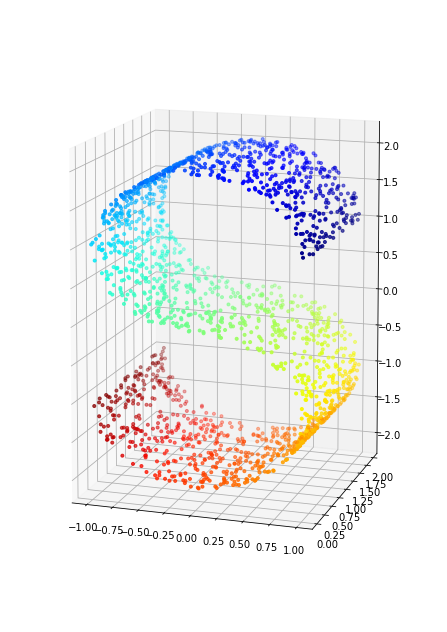

In [ ]:
from sklearn.datasets import make_s_curve
from matplotlib.ticker import NullFormatter

X, color = make_s_curve(2000)

fig = plt.figure(figsize=(45,25))
ax = fig.add_subplot(251, projection='3d')
ax.scatter(X[:,0],X[:,1],X[:,2],c=color, cmap=plt.cm.jet,s=9,lw=1)
ax.view_init(10,-72)

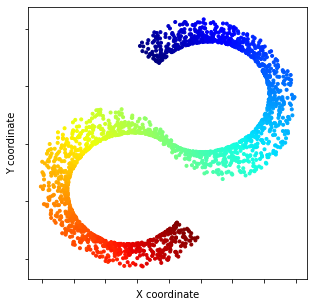

In [ ]:
mds = MDS (n_components=2)
X_mds= mds.fit_transform(X)
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(1,1,1)
ax.scatter(X_mds[:, 0], X_mds[:, 1], c=color, cmap=plt.cm.jet, s=9, lw=1)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
ax.axis('tight')
plt.ylabel('Y coordinate')
plt.xlabel('X coordinate')
plt.show()

### Locally Linear Embedding (LLE)

Mientras que las proyecciones de PCA y MDS no preservan la vecindad de los datos LLE identifica eficientemente la estructura de la variedad y asegura la vecindad de los datos en un espacio dimensional menor. Se utiliza en procesamiento de imágenes y texto.

#### Ventajas y limitaciones

Ventajas:    
1. Identifica eficientemente la estructura subyacente de la variedad
2. Es altamente eficiente descubriendo estructuras no lineales
3. Solo tiene un parámetro libre $k$
4. Eficiente computacionalmente

Limitaciones:     
1. Sensible a ruido y outliers
2. Asume una variedad infinitamente diferenciable. De no ser así, los resultados son pobres.


In [ ]:
from sklearn.manifold import LocallyLinearEmbedding

X = load_iris()['data']
y = load_iris()['target']
lle = LocallyLinearEmbedding(n_components=2,n_neighbors=50)
X_lle = lle.fit_transform(X)

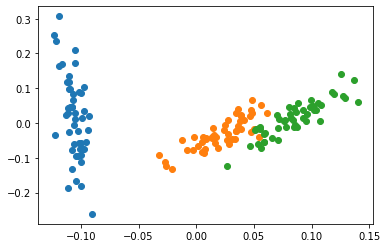

In [ ]:
plt.scatter(X_lle[y==0,0],X_lle[y==0,1])
plt.scatter(X_lle[y==1,0],X_lle[y==1,1])
plt.scatter(X_lle[y==2,0],X_lle[y==2,1])

### t-Distributed Stochastic Neighbor Embedding (t-SNE)

Mientras los algoritmos anteriores preserva la geometría local de los datos, no mantienen tanto la estructura local como la global de los datos en la proyección sobre el espacio dimensional más pequeño. t-SNE subsana esta deficiencia.

Es utilizado en el procesamiento de imágenes, bioinformática, procesamiento de señales, procesamiento de lenguaje, etc.

#### Ventajas y limitaciones

1. Es mucho mejor que otras técnicas para trabajar con datos no lineales.
2. Preserva el componente local y el componente global de los datos.
3. Mayor complejidad computacional en un gran volumen de datos.
4. Si los datos se reducen a una dimensión mayor a tres, el desempeño no es demasiado claro.
5. La no convexidad de la función de pérdida requiere seleccionar varios parámetros de optimización y esto afecta las soluciones construidas.

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

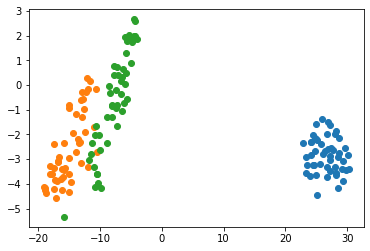

In [ ]:
plt.scatter(X_tsne[y==0,0],X_tsne[y==0,1])
plt.scatter(X_tsne[y==1,0],X_tsne[y==1,1])
plt.scatter(X_tsne[y==2,0],X_tsne[y==2,1])

## Clustering

El objetivo de los algoritmos de clustering es descubrir patrones en los datos en forma de grupos diferenciados, que tengan individuos homogéneos en su interior.

### K-Means

Este es uno de los métodos más utilizados en el aprendizaje no supervisado. Se busca realizar una agregación alrededor de centros móviles. Este tiene tres pasos simples:     

1. Se selecciona un número de $K$ centros iniciales de las clases que particionan el conjunto de datos en $K$ clases.
2. Se determinan los $K$ centros de gravedad.
3. Se determinan $K$ nuevos centros de las clases tomando los centros de gravedad de las clases en el paso $m-1$.

El algoritmo se detiene si la nueva partición no es mejor que la anterior (la inercia intraclases deja de disminuir).

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
X = load_iris()['data']
y = load_iris()['target']

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

Text(0.5, 1.0, 'PCA')

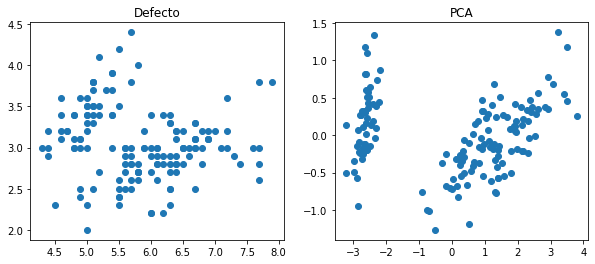

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(10,4))
ax[0].scatter(X[:,0],X[:,1])
ax[0].set_title('Defecto')
ax[1].scatter(X_pca[:,0],X_pca[:,1])
ax[1].set_title('PCA')

In [ ]:
km = KMeans(n_clusters=3)
km.fit(X_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
y_pred = km.labels_

Text(0.5, 1.0, 'PCA con kmeans')

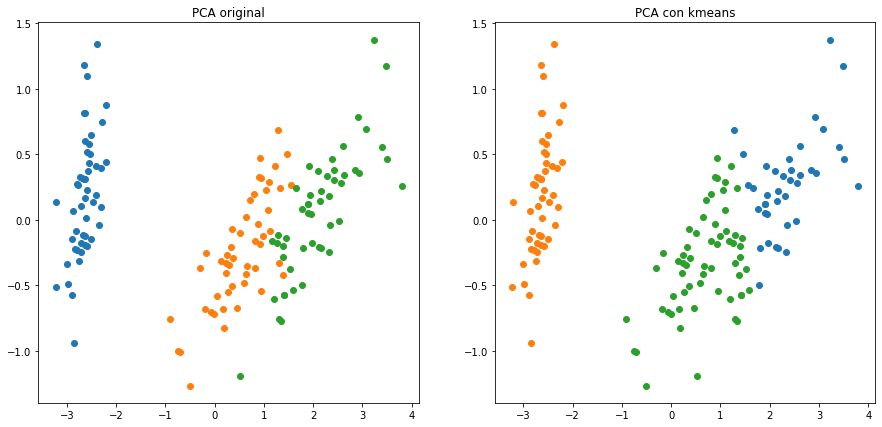

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(15,7))
ax[0].scatter(X_pca[y==0,0],X_pca[y==0,1])
ax[0].scatter(X_pca[y==1,0],X_pca[y==1,1])
ax[0].scatter(X_pca[y==2,0],X_pca[y==2,1])
ax[0].set_title('PCA original')
ax[1].scatter(X_pca[y_pred==0,0],X_pca[y_pred==0,1])
ax[1].scatter(X_pca[y_pred==1,0],X_pca[y_pred==1,1])
ax[1].scatter(X_pca[y_pred==2,0],X_pca[y_pred==2,1])
ax[1].set_title('PCA con kmeans')

## Evaluación del cluster

### Métricas de validacion interna

Las métricas siguen los siguientes criterios

- Cohesión: mínima cercanía intracluster
- Separación: máxima distancia entre clústers

#### Sum of Squared Within

$$SSE=\sum_{i=1}^k\sum_{x\in C_i}dist^2(m_i,x)$$

Siendo $k$ el número de clústeres, $x$ un punto del clúster $C_i$ y $m_i$ el centroide del clúster $C_i$
#### Sum of Squared Between

$$SSB=\sum_{j=1}^k n_j dist^2(c_j-\bar{x})$$

siendo $k$ el número de clústeres, $n_j$ el número de elementos en el clúster $j$, $c_j$ el centroide del clúster $j$ y $\bar{x}$ es la media del data set.

#### Coeficiente de Silhouette

El coeficiente para el punto $x$ está definido como:
$$s(x)=\frac{b(x)-a(x)}{\max{\{a(x),b(x)\}}}$$

Donde $a(x)$ es la distancia promedio de $x$ a todos los demás puntos en el mismo clúster; $b(x)$ es la distancia promedio de $x$ a todos los demás puntos en el clúster más cercano.

Para el agrupamiento sería:    

$$SC=\frac{1}{N}\sum_{i=1}^Ns(x)$$

#### Índice Davies-Bouldin

$$DB=\frac{1}{k}\sum_{i=1,i\neq j}^k\max \bigg(\frac{\sigma_i+\sigma_j}{d(c_i,c_j)}\bigg)$$

Donde $k$ es el número de clústeres, $\sigma_i$ es la distancia promedio entre cada punto en el clúster $i$ y el centroide del clúster, $\sigma_𝑗$ es la distancia promedio entre cada punto del clúster $j$ y el centroide del clúster, y $d(c_i , c_j )$ es la distancia entre los centroides de los 2 clústeres .

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [ ]:
silhouette_score(X_pca, y_pred, metric='euclidean')

0.5976764219497545

In [ ]:
davies_bouldin_score(X_pca,y_pred)

0.5648157434964133

In [ ]:
min_sc = {'n_clusters':[],
           'db_index': [],
           's_score': []}

for n_clusters in range(2,20):
  km = KMeans(n_clusters=n_clusters)
  km.fit(X_pca)
  y_pred = km.labels_
  min_sc['n_clusters'].append(n_clusters)
  min_sc['db_index'].append(davies_bouldin_score(X_pca,y_pred))
  min_sc['s_score'].append(silhouette_score(X_pca, y_pred))



In [ ]:
min_scdf = pd.DataFrame(min_sc)

In [ ]:
min_scdf

,n_clusters,db_index,s_score
0,2,0.370958,0.705670
1,3,0.564816,0.597676
2,4,0.604242,0.559111
3,5,0.636321,0.550964
4,6,0.716693,0.449420
5,7,0.744215,0.437439
6,8,0.690693,0.453941
7,9,0.760152,0.419174
8,10,0.714392,0.426736
9,11,0.738791,0.407270


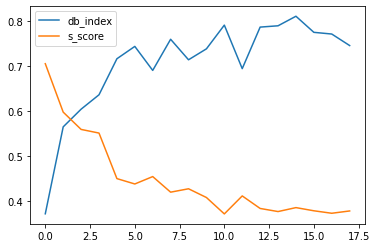

In [ ]:
plt.plot(min_scdf['db_index'], label='db_index')
plt.plot(min_scdf['s_score'], label='s_score')
plt.legend()